In [142]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use({'figure.facecolor':'white'})

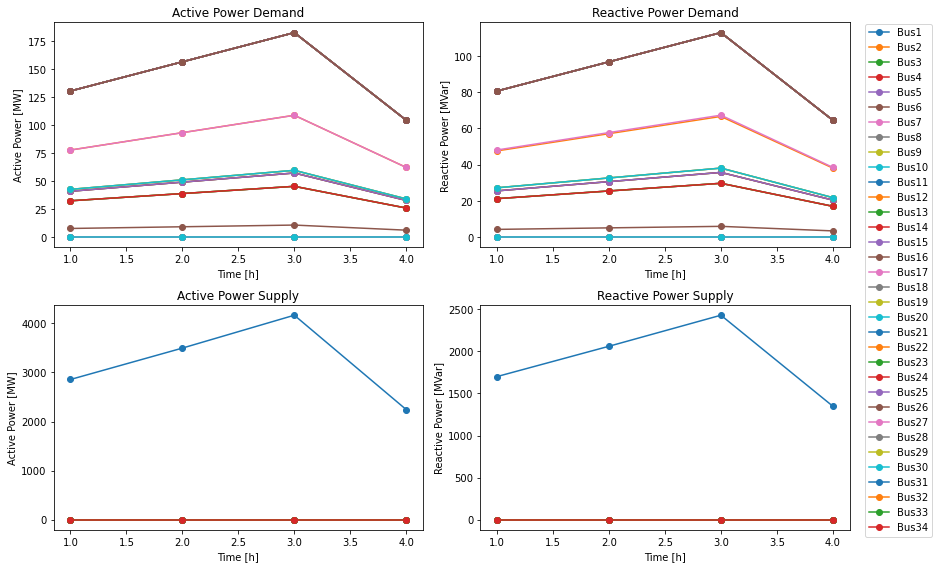

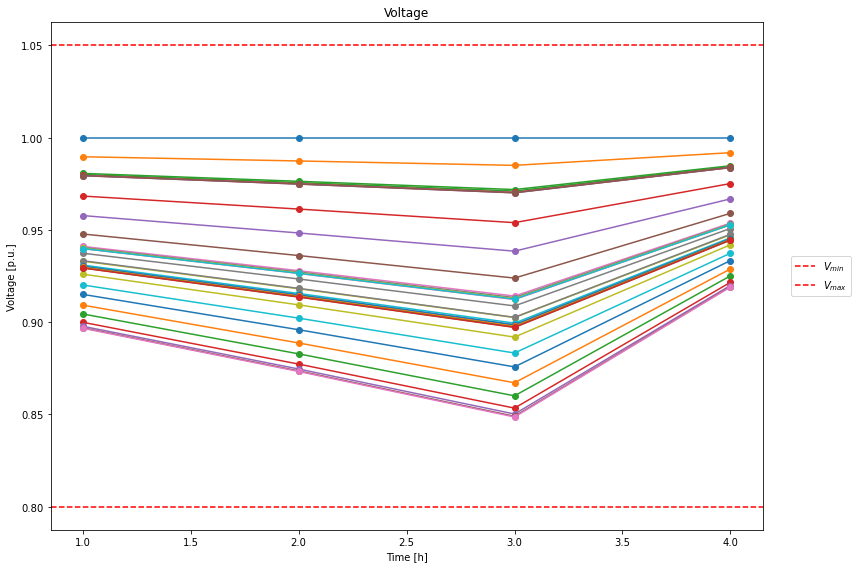

In [206]:
def vis(data, buses, lines, model, Sbase):
    # DATA VISUALIZATION - VOLTAGES AND ACTIVE/REACTIVE POWERS AND CURRENTS/LOADING OF LINES
    voltage = pd.DataFrame(columns=buses, index=data['SystemDemand']['TIME'].values)
    loading = pd.DataFrame(columns=lines, index=data['SystemDemand']['TIME'].values)
    active_d = pd.DataFrame(columns=buses, index=data['SystemDemand']['TIME'].values)
    reactive_d = pd.DataFrame(columns=buses, index=data['SystemDemand']['TIME'].values)
    active_s = pd.DataFrame(columns=buses, index=data['SystemDemand']['TIME'].values)
    reactive_s = pd.DataFrame(columns=buses, index=data['SystemDemand']['TIME'].values)

    for t in model.TIME:
        for n in model.NODES:
            voltage.loc[t,n] = model.V[n,t].value
            active_d.loc[t,n] = model.Pd[n,t].value*Sbase
            reactive_d.loc[t,n] = model.Qd[n,t].value*Sbase
            active_s.loc[t,n] = model.Ps[n,t].value*Sbase
            reactive_s.loc[t,n] = model.Qs[n,t].value*Sbase

    for i,j in model.LINES:
        for t in model.TIME:
            loading.loc[t, pd.IndexSlice[i, j]] = model.I[i,j,t].value

    fig_pow, ax_pow = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(12,8))
    ax_pow[0,0].plot(active_d.index, active_d, marker='o');ax_pow[0,0].set_xlabel('Time [h]');ax_pow[0,0].set_ylabel('Active Power [kW]');ax_pow[0,0].set_title('Active Power Demand');
    ax_pow[0,1].plot(reactive_d.index, reactive_d, marker='o');ax_pow[0,1].set_xlabel('Time [h]');ax_pow[0,1].set_ylabel('Reactive Power [kVar]');ax_pow[0,1].set_title('Reactive Power Demand');
    ax_pow[1,0].plot(active_s.index, active_s, marker='o');ax_pow[1,0].set_xlabel('Time [h]');ax_pow[1,0].set_ylabel('Active Power [kW]');ax_pow[1,0].set_title('Active Power Supply');
    ax_pow[1,1].plot(reactive_s.index, reactive_s, marker='o');ax_pow[1,1].set_xlabel('Time [h]');ax_pow[1,1].set_ylabel('Reactive Power [kVar]');ax_pow[1,1].set_title('Reactive Power Supply');
    fig_pow.legend(['Bus'+str(i) for i in active_d.columns], bbox_to_anchor=(1.04,0.5), loc='center', borderaxespad=0);
    fig_pow.tight_layout()
    fig_pow.show;

    b=['Bus'+str(i) for i in active_d.columns]
    b.extend({'$V_{min}$','$V_{max}$'})
    fig_v, ax_v = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(12,8))
    ax_v[0,0].plot(voltage.index, voltage, marker='o');ax_v[0,0].set_xlabel('Time [h]');ax_v[0,0].set_ylabel('Voltage [p.u.]');ax_v[0,0].set_title('Voltage');
    ax_v[0,0].axhline(model.Vmin.value, color='r', linestyle='--')
    ax_v[0,0].axhline(model.Vmax.value, color='r', linestyle='--')
    ax_v[0,0].legend(b, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    fig_v.tight_layout()
    fig_v.show;

    fig_i, ax_i = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(12,8))
    ax_i[0,0].plot(loading.index, loading, marker='o');ax_i[0,0].set_xlabel('Time [h]');ax_i[0,0].set_ylabel('Current [p.u.]');ax_i[0,0].set_title('Current');
    fig_i.legend(['Line '+str(i)+'-'+str(j) for i,j in loading.columns], bbox_to_anchor=(1.04,0.5), loc='center', borderaxespad=0);
    fig_i.tight_layout()
    fig_i.show;